<a href="https://colab.research.google.com/github/blaxman37/Laxman_github/blob/main/ChurnPredictionTelcom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random

In [ ]:
#import data set
df =pd.read_csv('/content/churn_data.csv')
df.head(5)


,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [ ]:
df['churn'].value_counts()

0    15826
1    11174
Name: churn, dtype: int64

In [ ]:
#Display top rows
#find the Shaper of our data
#get Information about our dataset like Total Number Rows, col,data type
#Check for Null values
#Overall statistics about Data set
#Droppping irreleveant features
#Encoding categorical Data
#Not Handling imbalanced
#Spliting The Dataset in to Training Set and Test Set
#Feature Scalling
#Logistic regression
#SVC
#Decision Tree Classifier
#random Forest Classifier
#Gradient Booating Classifier
#Save the model



In [ ]:
#shape of data
df.shape



(27000, 31)

In [ ]:
#Check for Null values
df.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

In [ ]:
#get information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27000 entries, 0 to 26999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user                     27000 non-null  int64  
 1   churn                    27000 non-null  int64  
 2   age                      26996 non-null  float64
 3   housing                  27000 non-null  object 
 4   credit_score             18969 non-null  float64
 5   deposits                 27000 non-null  int64  
 6   withdrawal               27000 non-null  int64  
 7   purchases_partners       27000 non-null  int64  
 8   purchases                27000 non-null  int64  
 9   cc_taken                 27000 non-null  int64  
 10  cc_recommended           27000 non-null  int64  
 11  cc_disliked              27000 non-null  int64  
 12  cc_liked                 27000 non-null  int64  
 13  cc_application_begin     27000 non-null  int64  
 14  app_downloaded        

In [ ]:
#Get overall statistics of Dataset
df.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [ ]:
#Drop irrielveant Feaures
df.columns


Index(['user', 'churn', 'age', 'housing', 'credit_score', 'deposits',
       'withdrawal', 'purchases_partners', 'purchases', 'cc_taken',
       'cc_recommended', 'cc_disliked', 'cc_liked', 'cc_application_begin',
       'app_downloaded', 'web_user', 'app_web_user', 'ios_user',
       'android_user', 'registered_phones', 'payment_type', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan', 'zodiac_sign',
       'left_for_two_month_plus', 'left_for_one_month', 'rewards_earned',
       'reward_rate', 'is_referred'],
      dtype='object')

In [ ]:
#data tpes of the columns
df.dtypes

user                         int64
churn                        int64
age                        float64
housing                     object
credit_score               float64
deposits                     int64
withdrawal                   int64
purchases_partners           int64
purchases                    int64
cc_taken                     int64
cc_recommended               int64
cc_disliked                  int64
cc_liked                     int64
cc_application_begin         int64
app_downloaded               int64
web_user                     int64
app_web_user                 int64
ios_user                     int64
android_user                 int64
registered_phones            int64
payment_type                object
waiting_4_loan               int64
cancelled_loan               int64
received_loan                int64
rejected_loan                int64
zodiac_sign                 object
left_for_two_month_plus      int64
left_for_one_month           int64
rewards_earned      

In [ ]:
#Display the columns and count of missing values#
nan_col = df.columns[df.isnull().any()]
for i in nan_col:
    print(i,df[i].isnull().sum())


age 4
credit_score 8031
rewards_earned 3227


In [ ]:
df.churn.value_counts()

0    15826
1    11174
Name: churn, dtype: int64

In [ ]:
df.age = df.age.fillna(df.age.mean())
df.age

0        37.0
1        28.0
2        35.0
3        26.0
4        27.0
         ... 
26995    24.0
26996    26.0
26997    22.0
26998    46.0
26999    34.0
Name: age, Length: 27000, dtype: float64

In [ ]:
df.age =df.age .astype(int)


In [ ]:
#Credit score and rewards earned have significant amount of null values. We will drop them from our model.
df =df.drop(columns=['credit_score','rewards_earned'])
     

In [ ]:
df.isna().sum()

user                       0
churn                      0
age                        0
housing                    0
deposits                   0
withdrawal                 0
purchases_partners         0
purchases                  0
cc_taken                   0
cc_recommended             0
cc_disliked                0
cc_liked                   0
cc_application_begin       0
app_downloaded             0
web_user                   0
app_web_user               0
ios_user                   0
android_user               0
registered_phones          0
payment_type               0
waiting_4_loan             0
cancelled_loan             0
received_loan              0
rejected_loan              0
zodiac_sign                0
left_for_two_month_plus    0
left_for_one_month         0
reward_rate                0
is_referred                0
dtype: int64

In [ ]:
df1 = df.drop(columns=['user'])
df1.head()

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,37,na,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,0,28,R,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,0,35,R,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,0,26,R,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,1,27,na,0,0,2,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

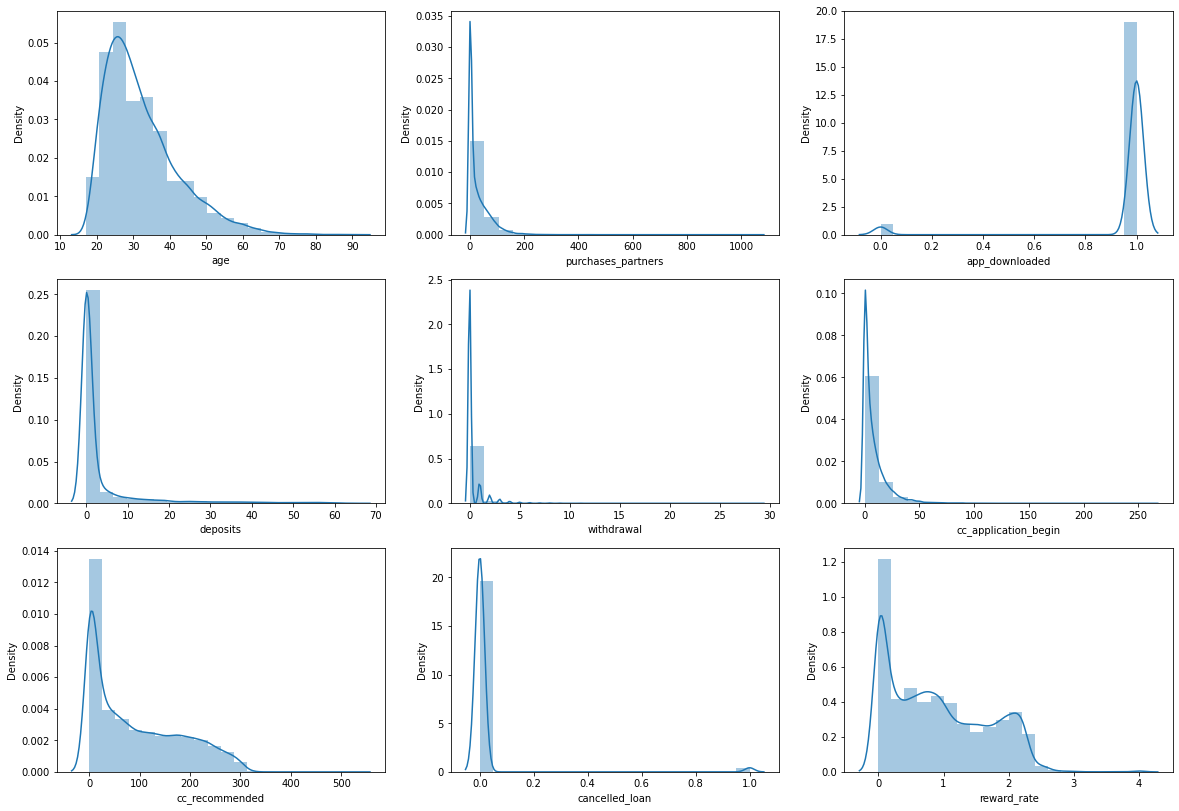

In [ ]:
# Features Histograms
fig, ax = plt.subplots(3,3, figsize=(20, 14))
sns.distplot(df.age, bins = 20, ax=ax[0,0])  
sns.distplot(df.purchases_partners, bins = 20, ax=ax[0,1]) 
sns.distplot(df.app_downloaded, bins = 20, ax=ax[0,2]) 
sns.distplot(df.deposits, bins = 20, ax=ax[1,0]) 
sns.distplot(df.withdrawal, bins = 20, ax=ax[1,1]) 
sns.distplot(df.cc_application_begin, bins = 20, ax=ax[1,2]) 
sns.distplot(df.cc_recommended, bins = 20, ax=ax[2,0]) 
sns.distplot(df.cancelled_loan, bins = 20, ax=ax[2,1]) 
sns.distplot(df.reward_rate, bins = 20, ax=ax[2,2]) 
plt.show()

Few things to note:

Age: Distribution is right skewed, intuitively it makes sense as older people don’t use the services
Deposit/withdrawal: Majority of people have no deposit (as the data we have is for first couple of months, and for this time period, activity could be low)

In [ ]:
df[df1.waiting_4_loan==1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [ ]:
df[df1.cancelled_loan==1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [ ]:
df[df1.received_loan==1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [ ]:
df[df1.rejected_loan==1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

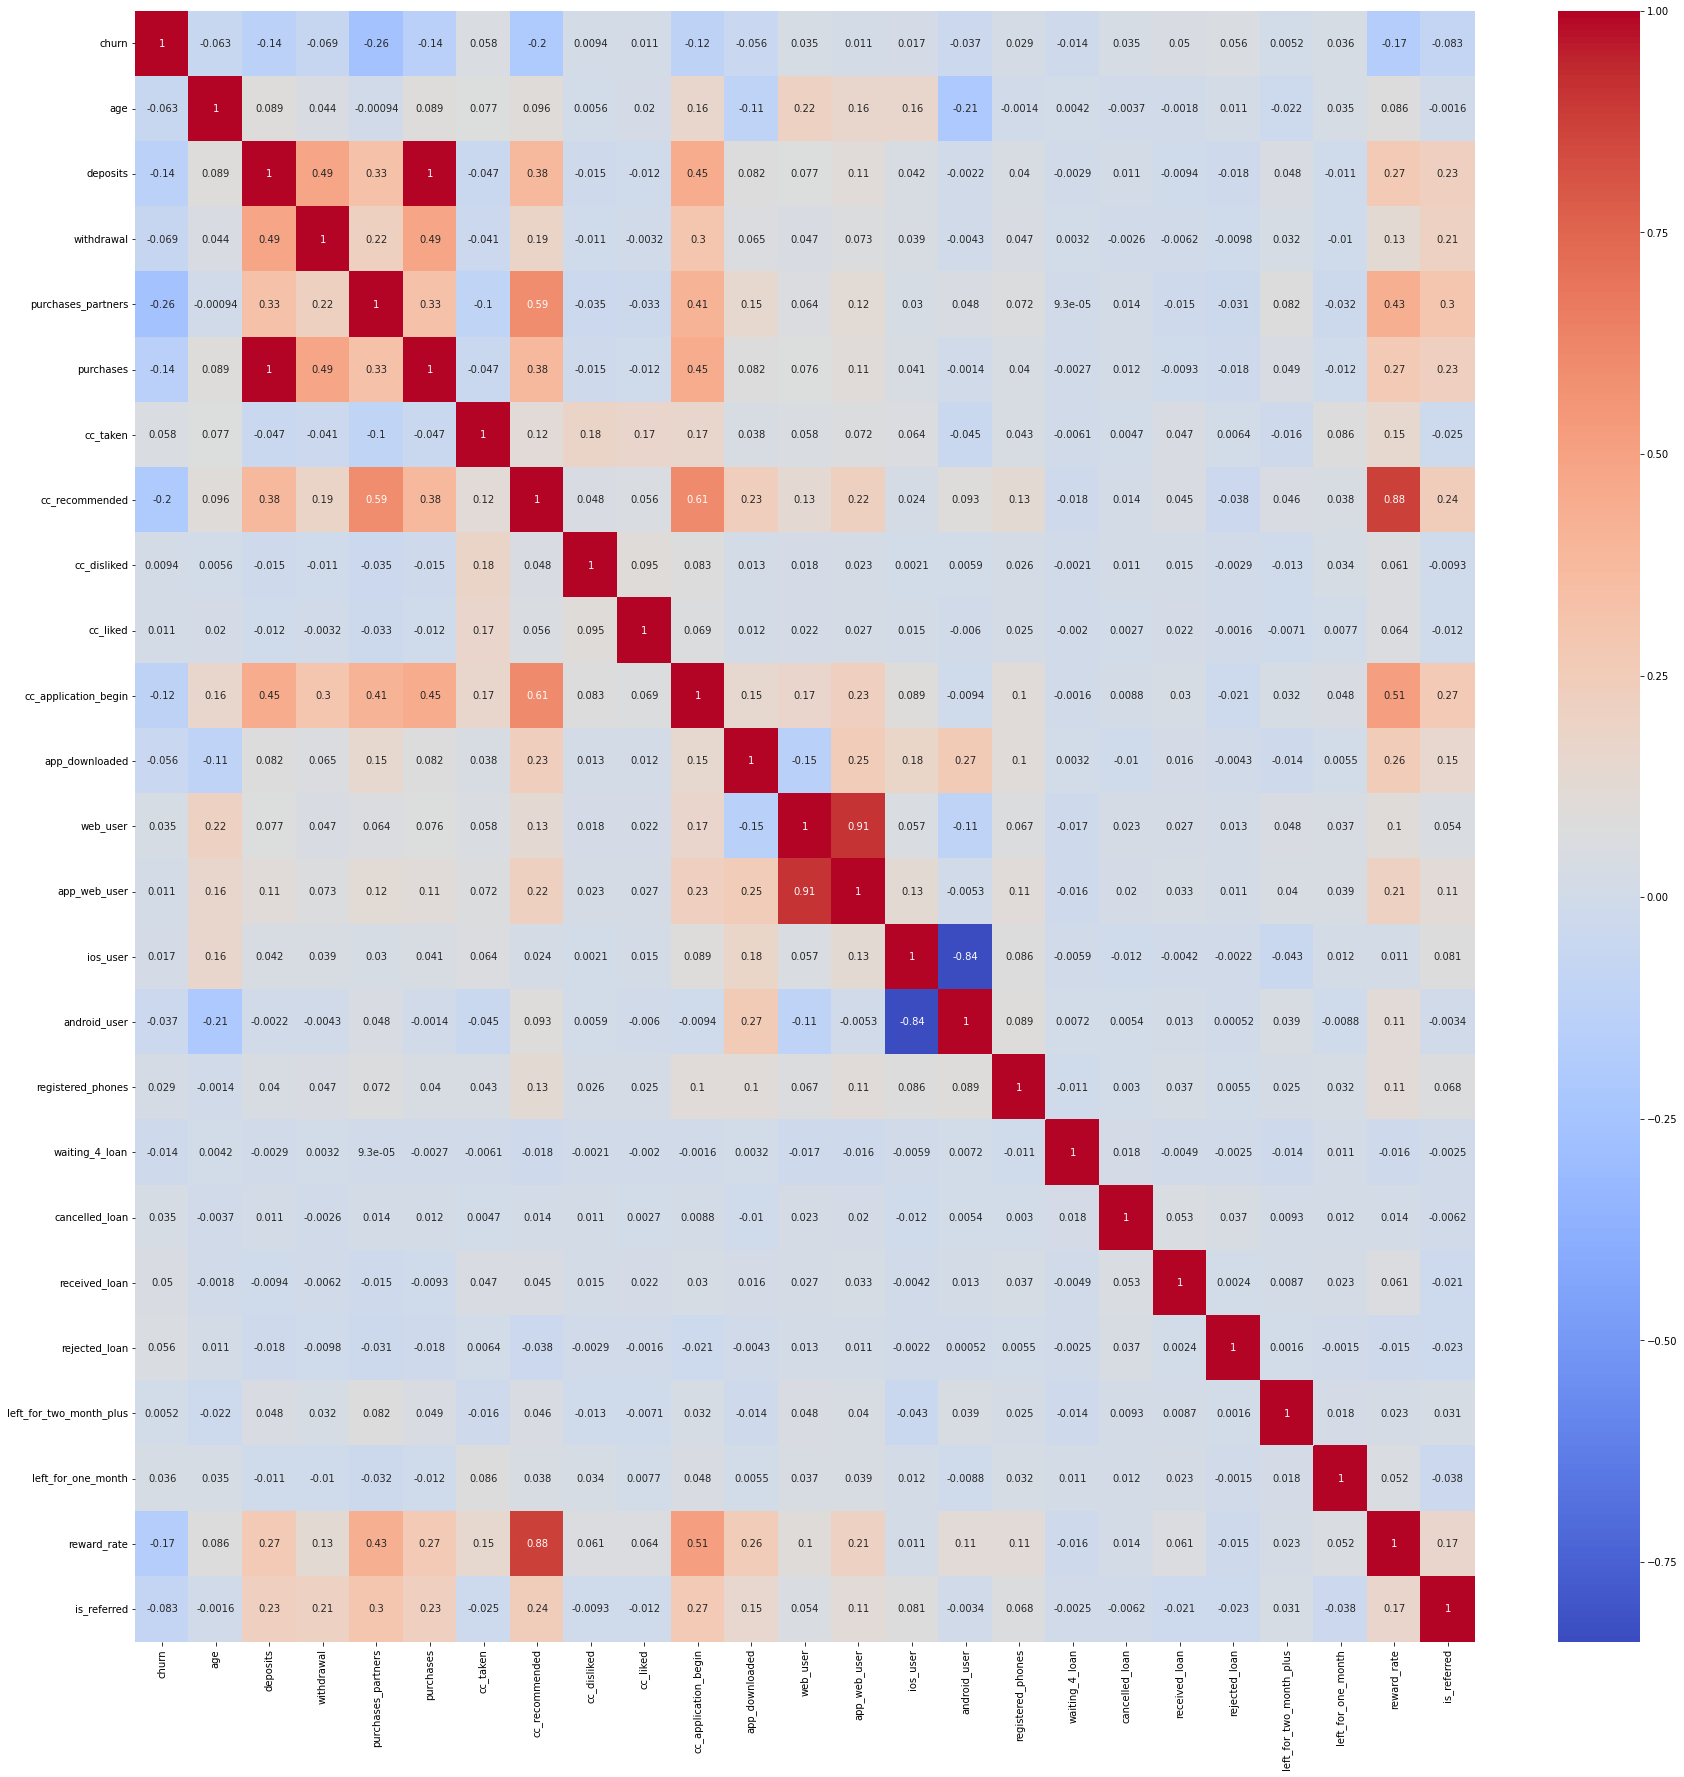

In [ ]:
plt.figure(figsize =(30,30))
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm')

In [ ]:
df.to_csv('new,index=False')

In [ ]:
df.drop(columns=['app_web_user'])

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,24291,1,24,R,0,0,0,0,0,81,...,Weekly,0,0,0,0,Leo,0,0,1.07,1
26996,4116,1,26,na,0,0,2,0,0,1,...,Bi-Weekly,0,0,0,1,Cancer,1,0,0.67,0
26997,23740,0,22,na,0,0,37,0,0,98,...,Bi-Weekly,0,0,0,0,Taurus,0,0,0.93,0
26998,47663,1,46,na,2,0,16,2,0,58,...,Semi-Monthly,0,0,0,0,Aries,1,0,0.90,1


In [ ]:
df =df.drop(columns=['user'])
df

,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,0,37,na,0,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,0,28,R,0,0,1,0,0,96,0,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,0,35,R,47,2,86,47,0,285,0,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,0,26,R,26,3,38,25,0,74,0,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,1,27,na,0,0,2,0,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,1,24,R,0,0,0,0,0,81,0,...,Weekly,0,0,0,0,Leo,0,0,1.07,1
26996,1,26,na,0,0,2,0,0,1,0,...,Bi-Weekly,0,0,0,1,Cancer,1,0,0.67,0
26997,0,22,na,0,0,37,0,0,98,0,...,Bi-Weekly,0,0,0,0,Taurus,0,0,0.93,0
26998,1,46,na,2,0,16,2,0,58,0,...,Semi-Monthly,0,0,0,0,Aries,1,0,0.90,1


In [ ]:
df1 =pd.get_dummies(df1)
df1

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
0,0,37,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,28,0,0,1,0,0,96,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,35,47,2,86,47,0,285,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,26,26,3,38,25,0,74,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,27,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,1,24,0,0,0,0,0,81,0,0,...,0,0,1,0,0,0,0,0,0,0
26996,1,26,0,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26997,0,22,0,0,37,0,0,98,0,0,...,0,0,0,0,0,0,0,1,0,0
26998,1,46,2,0,16,2,0,58,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.columns

Index(['churn', 'age', 'deposits', 'withdrawal', 'purchases_partners',
       'purchases', 'cc_taken', 'cc_recommended', 'cc_disliked', 'cc_liked',
       'cc_application_begin', 'app_downloaded', 'web_user', 'app_web_user',
       'ios_user', 'android_user', 'registered_phones', 'waiting_4_loan',
       'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'is_referred', 'housing_O', 'housing_R', 'housing_na',
       'payment_type_Bi-Weekly', 'payment_type_Monthly',
       'payment_type_Semi-Monthly', 'payment_type_Weekly', 'payment_type_na',
       'zodiac_sign_Aquarius', 'zodiac_sign_Aries', 'zodiac_sign_Cancer',
       'zodiac_sign_Capricorn', 'zodiac_sign_Gemini', 'zodiac_sign_Leo',
       'zodiac_sign_Libra', 'zodiac_sign_Pisces', 'zodiac_sign_Sagittarius',
       'zodiac_sign_Scorpio', 'zodiac_sign_Taurus', 'zodiac_sign_Virgo',
       'zodiac_sign_na'],
      dtype='object')

In [ ]:
df1.dtypes

churn                          int64
age                            int64
deposits                       int64
withdrawal                     int64
purchases_partners             int64
purchases                      int64
cc_taken                       int64
cc_recommended                 int64
cc_disliked                    int64
cc_liked                       int64
cc_application_begin           int64
app_downloaded                 int64
web_user                       int64
app_web_user                   int64
ios_user                       int64
android_user                   int64
registered_phones              int64
waiting_4_loan                 int64
cancelled_loan                 int64
received_loan                  int64
rejected_loan                  int64
left_for_two_month_plus        int64
left_for_one_month             int64
reward_rate                  float64
is_referred                    int64
housing_O                      uint8
housing_R                      uint8
h

In [ ]:
df1=df1.drop(columns=['housing_na','zodiac_sign_na','housing_na'])
df1

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
0,0,37,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,28,0,0,1,0,0,96,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,35,47,2,86,47,0,285,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,26,26,3,38,25,0,74,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,27,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,1,24,0,0,0,0,0,81,0,0,...,0,0,0,1,0,0,0,0,0,0
26996,1,26,0,0,2,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
26997,0,22,0,0,37,0,0,98,0,0,...,0,0,0,0,0,0,0,0,1,0
26998,1,46,2,0,16,2,0,58,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df1.dtypes

churn                          int64
age                            int64
deposits                       int64
withdrawal                     int64
purchases_partners             int64
purchases                      int64
cc_taken                       int64
cc_recommended                 int64
cc_disliked                    int64
cc_liked                       int64
cc_application_begin           int64
app_downloaded                 int64
web_user                       int64
app_web_user                   int64
ios_user                       int64
android_user                   int64
registered_phones              int64
waiting_4_loan                 int64
cancelled_loan                 int64
received_loan                  int64
rejected_loan                  int64
left_for_two_month_plus        int64
left_for_one_month             int64
reward_rate                  float64
is_referred                    int64
housing_O                      uint8
housing_R                      uint8
p

# Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1.drop(columns='churn'),df1['churn'],test_size = 0.2,random_state = 0)

In [ ]:
y_train.value_counts()

0    12667
1     8933
Name: churn, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#Predicting Test Set
y_predict = model.predict(x_test)
y_predict

array([0, 0, 0, ..., 1, 1, 0])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [ ]:
cm =confusion_matrix(y_test, y_predict)
cm

array([[2366,  793],
       [1146, 1095]])

In [ ]:
acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
  

In [ ]:
Log_results = pd.DataFrame([['Logistic Regression',acc,prec,rec,f1]],columns =['Model','Accuracy','Precision','Recall','F1 Score'])
Log_results


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.640926,0.579979,0.488621,0.530395


2) Random Forest using RandomCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF_C=RandomForestClassifier(n_estimators = 100)
RF_C


RandomForestClassifier()

In [ ]:
#
y_predict = RF_C.predict(x_test)
y_predict

array([0, 0, 1, ..., 1, 1, 0])

In [ ]:
RF_C.fit(x_train,y_train)


RandomForestClassifier()

In [ ]:
RF_C.score(x_test,y_test)

0.7196296296296296

In [ ]:
acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
  

In [ ]:
RF_results = pd.DataFrame([['RandomForest',acc,prec,rec,f1]],columns =['Model','Accuracy','Precision','Recall','F1 Score'])
RF_results

,Model,Accuracy,Precision,Recall,F1 Score
0,RandomForest,0.721667,0.703418,0.569389,0.629346
